In [86]:
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()


True

In [87]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
from decouple import config


In [126]:
conn = psycopg2.connect(
    host=config('POSTGRES_HOST'),
    port="5432",
    database="db13f2023",
    user=config('POSTGRES_USER'),
    password=config('POSTGRES_PASSWORD')
)

conn.commit()
cur = conn.cursor()

cur.execute("""
SELECT
	ticker,
	sum(value) AS value_shares
FROM
	"holdings"
INNER JOIN filings
ON
	filings.filing_id = holdings.filing_id
INNER JOIN holding_infos
ON
	holdings.cusip = holding_infos.cusip
WHERE
	cik = '1067983'
GROUP BY
	ticker
ORDER BY
	value_shares DESC;
""")

rows = cur.fetchall()

cur.close()

# Extract the 'Ticker' column from the query results
tickers = [row[0] for row in rows]

# Create a DataFrame with the 'Ticker' data
tickers_df = pd.DataFrame(tickers, columns=['Ticker'])[:10]


In [127]:
tickers_df


,Ticker
0,AAPL
1,BAC
2,AXP
3,KO
4,CHV


In [128]:
stock = tickers_df['Ticker'].tolist()
stock.extend(['QQQ', 'SPY', 'DIA'])
stocks = yf.download(stock, start = '2018-10-13', end = '2023-10-13')
data = stocks.loc[:, 'Close'].copy()


[*********************100%%**********************]  8 of 8 completed


1 Failed download:
['CHV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-10-13 -> 2023-10-13)')


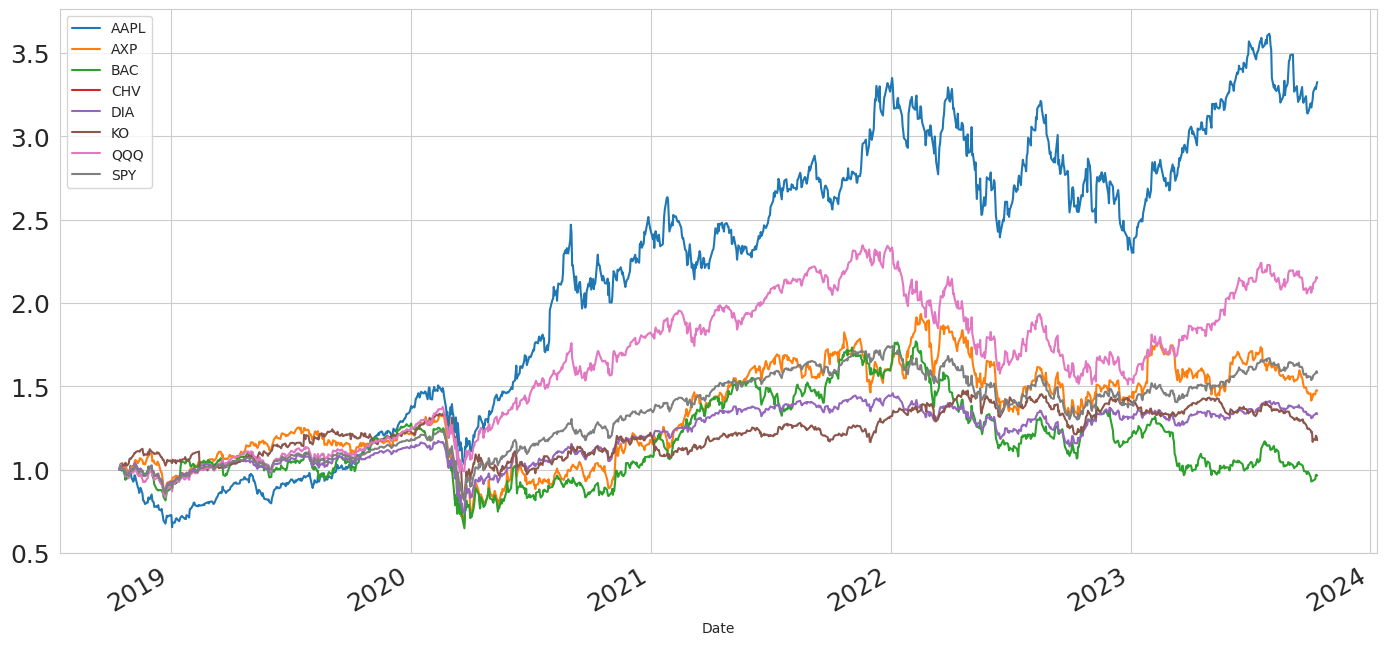

In [133]:
norm_data = data.div(data.iloc[0]).mul(1)
norm_data.plot(figsize = (17, 8), fontsize = 18)
sns.set_style("whitegrid")
plt.show()
